In [44]:
import pandas as pd
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import KFold, train_test_split, cross_val_score, cross_val_predict, StratifiedKFold
from sklearn.utils.multiclass import type_of_target
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn import tree
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, plot_confusion_matrix
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier

In [81]:
bank_data = pd.read_csv("BankChurners.csv").drop(columns = ['CLIENTNUM'])

In [82]:
bank_data1 = bank_data.replace('Unknown', np.nan)

card_cate_map = {'Blue': 0, 'Silver': 1, 'Gold':2, 'Platinum': 3}
for i in range(len(bank_data1['Card_Category'])):
    for j in card_cate_map:
        if bank_data1['Card_Category'][i] == j:
            bank_data1.at[i, 'Card_Category'] = card_cate_map[j]       

#Transfer education category to integers, because there is a hierarical relationship
education_cate_map = {'Uneducated':0,'High School':1,'College':2,'Graduate':3,'Post-Graduate':4, 'Doctorate':5 }
for i in range(len(bank_data1['Education_Level'])):
    for j in education_cate_map:
        if bank_data1['Education_Level'][i] == j:
            bank_data1.at[i, 'Education_Level'] = education_cate_map[j]

income_cate_map = { 'Less than $40K': 0, '$40K - $60K': 1, '$60K - $80K': 2, '$80K - $120K':3, '$120K +': 4}
for i in range(len(bank_data1['Income_Category'])):
    for j in income_cate_map:
        if bank_data1['Income_Category'][i] == j:
            bank_data1.at[i, 'Income_Category'] = income_cate_map[j]
            
attrition_flag_map = {'Existing Customer': 0, 'Attrited Customer': 1}
for i in range(len(bank_data1['Attrition_Flag'])):
    for j in attrition_flag_map:
        if bank_data1['Attrition_Flag'][i] == j:
            bank_data1.at[i, 'Attrition_Flag'] = attrition_flag_map[j]
            
data1 = pd.get_dummies(bank_data1, columns = ['Gender','Marital_Status'])

data1.fillna(data.mean(), inplace=True)

data1

,Attrition_Flag,Customer_Age,Dependent_count,Education_Level,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,...,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender_F,Gender_M,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single
0,0,45,3,1.000000,2.0,0,39,5,1,3,...,1.335,1144,42,1.625,0.061,0,1,0,1,0
1,0,49,5,3.000000,0.0,0,44,6,1,2,...,1.541,1291,33,3.714,0.105,1,0,0,0,1
2,0,51,3,3.000000,3.0,0,36,4,1,0,...,2.594,1887,20,2.333,0.000,0,1,0,1,0
3,0,40,4,1.000000,0.0,0,34,3,4,1,...,1.405,1171,20,2.333,0.760,1,0,0,0,0
4,0,40,3,0.000000,2.0,0,21,5,1,0,...,2.175,816,28,2.500,0.000,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,0,50,2,3.000000,1.0,0,40,3,2,3,...,0.703,15476,117,0.857,0.462,0,1,0,0,1
10123,1,41,2,909.724035,1.0,0,25,4,2,3,...,0.804,8764,69,0.683,0.511,0,1,1,0,0
10124,1,44,1,1.000000,0.0,0,36,5,3,4,...,0.819,10291,60,0.818,0.000,1,0,0,1,0
10125,1,30,2,3.000000,1.0,0,36,4,3,3,...,0.535,8395,62,0.722,0.000,0,1,0,0,0


In [73]:
bank_data2 = bank_data

#Transfer card category to integers, because there is a hierarical relationship
card_cate_map = {'Blue': 0, 'Silver': 1, 'Gold':2, 'Platinum': 3}
for i in range(len(bank_data2['Card_Category'])):
    for j in card_cate_map:
        if bank_data2['Card_Category'][i] == j:
            bank_data2.at[i, 'Card_Category'] = card_cate_map[j]       

#Transfer education category to integers, because there is a hierarical relationship
education_cate_map = {'Unknown':np.nan,'Uneducated':0,'High School':1,'College':2,'Graduate':3,'Post-Graduate':4, 'Doctorate':5 }
for i in range(len(bank_data2['Education_Level'])):
    for j in education_cate_map:
        if bank_data2['Education_Level'][i] == j:
            bank_data2.at[i, 'Education_Level'] = education_cate_map[j]

income_cate_map = {'Unknown': np.nan, 'Less than $40K': 0, '$40K - $60K': 1, '$60K - $80K': 2, '$80K - $120K':3, '$120K +': 4}
for i in range(len(bank_data2['Income_Category'])):
    for j in income_cate_map:
        if bank_data2['Income_Category'][i] == j:
            bank_data2.at[i, 'Income_Category'] = income_cate_map[j]
            
attrition_flag_map = {'Existing Customer': 0, 'Attrited Customer': 1}
for i in range(len(bank_data2['Attrition_Flag'])):
    for j in attrition_flag_map:
        if bank_data2['Attrition_Flag'][i] == j:
            bank_data2.at[i, 'Attrition_Flag'] = attrition_flag_map[j]
            
data_pd = pd.get_dummies(bank_data2, columns = ['Gender','Marital_Status'])
data_pd

,Attrition_Flag,Customer_Age,Dependent_count,Education_Level,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,...,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender_F,Gender_M,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown
0,0,45,3,1,2,0,39,5,1,3,...,1144,42,1.625,0.061,0,1,0,1,0,0
1,0,49,5,3,0,0,44,6,1,2,...,1291,33,3.714,0.105,1,0,0,0,1,0
2,0,51,3,3,3,0,36,4,1,0,...,1887,20,2.333,0.000,0,1,0,1,0,0
3,0,40,4,1,0,0,34,3,4,1,...,1171,20,2.333,0.760,1,0,0,0,0,1
4,0,40,3,0,2,0,21,5,1,0,...,816,28,2.500,0.000,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,0,50,2,3,1,0,40,3,2,3,...,15476,117,0.857,0.462,0,1,0,0,1,0
10123,1,41,2,NaN,1,0,25,4,2,3,...,8764,69,0.683,0.511,0,1,1,0,0,0
10124,1,44,1,1,0,0,36,5,3,4,...,10291,60,0.818,0.000,1,0,0,1,0,0
10125,1,30,2,3,1,0,36,4,3,3,...,8395,62,0.722,0.000,0,1,0,0,0,1


In [74]:
data_np = data_pd.to_numpy()

In [75]:
imp_mean = IterativeImputer(random_state=0)
imp_mean.fit(data_np)
IterativeImputer(random_state=0)
data2 = imp_mean.transform(data_np)

In [76]:
array_sum = np.sum(data2)
array_has_nan = np.isnan(array_sum)
array_has_nan

False

In [33]:
X = data[:, 1:]
y = data[:, 0]

# Use LabelEncoder to transform target values into integers.
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

print(type_of_target(y))
print(y)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

binary
[0 0 0 ... 1 1 1]


In [34]:
# Preprocess the data with the StandardScalar
sc_X = StandardScaler()
X = sc_X.fit_transform(X)

# Removes highly correlated data
X = pd.DataFrame(X)
cor_matrix = X.corr().abs()
# Select upper triangle of correlation matrix
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.90)]
print("There are " + str(len(to_drop)) + " columns to be dropped")
X = X.drop(X.columns[to_drop], axis = 1)

There are 2 columns to be dropped


In [ ]:
feature_dict={}
high_low_dict = {}
    
def feature_importance(name, model):
    model.fit(X, y)
    temp_dict={}
    if name == "SVM Linear":
        importance = [abs(model.coef_[0][i]) for i in range(len(model.coef_[0]))]
    else:
        importance = model.feature_importances_
    for i,v in enumerate(importance):
        temp_dict['Feature ' + str(i)] = v
        feature_dict[name + ' Feature'] = temp_dict
    plt.bar([x for x in range(len(importance))], importance)
    plt.show()

def high_low_feature(feature_dict):
    final_dict={}
    for i in feature_dict:
        temp_dict={}
        max_key = max(feature_dict[i], key=feature_dict[i].get)
        max_value = max(feature_dict[i].values())
        temp_dict[max_key] = max_value
        final_dict[i] = temp_dict
    print(final_dict)

The model running is: Decision Tree


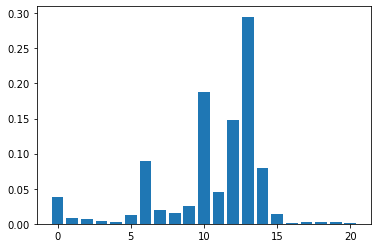

{'Decision Tree Feature': {'Feature 13': 0.29508372878868355}}
The mean accuracy of  Decision Tree  is: 0.9416415243805834  and the standard deviation is: 0.005781442790867103
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      8500
           1       0.81      0.81      0.81      1627

    accuracy                           0.94     10127
   macro avg       0.89      0.89      0.89     10127
weighted avg       0.94      0.94      0.94     10127

                 Predicted Negative  Predicted Positive
Actual Negative                8191                 309
Actual Positive                 313                1314

The FN is  313
The tn is  8191
The tp is  1314
The fp is  309

The precision is:  0.8096118299445472
The recall is:  0.8076213890596189
The f1 score is:  0.8086153846153846
Area under the Receiver Operating Characteristic curve: 0.8856342239415741


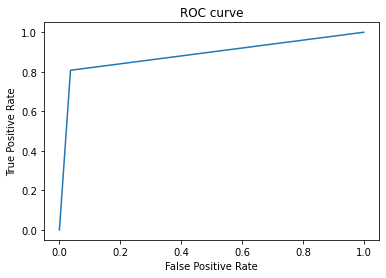


The model running is: SVM Linear


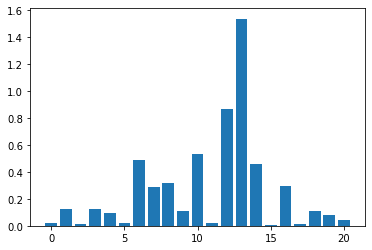

{'Decision Tree Feature': {'Feature 13': 0.29508372878868355}, 'SVM Linear Feature': {'Feature 13': 1.5388422230475953}}
The mean accuracy of  SVM Linear  is: 0.9056966594761923  and the standard deviation is: 0.005575593982571317
              precision    recall  f1-score   support

           0       0.92      0.97      0.95      8500
           1       0.79      0.58      0.67      1627

    accuracy                           0.91     10127
   macro avg       0.86      0.77      0.81     10127
weighted avg       0.90      0.91      0.90     10127

                 Predicted Negative  Predicted Positive
Actual Negative                8252                 248
Actual Positive                 686                 941

The FN is  686
The tn is  8252
The tp is  941
The fp is  248

The precision is:  0.7914213624894869
The recall is:  0.5783650891210818
The f1 score is:  0.6683238636363636
Area under the Receiver Operating Characteristic curve: 0.7745943092664234


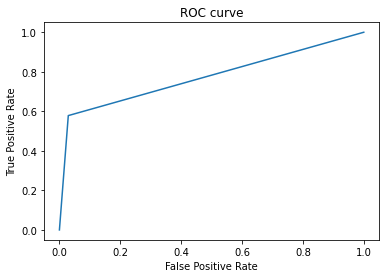


The model running is: BaggingClassifier
{'Decision Tree Feature': {'Feature 13': 0.29508372878868355}, 'SVM Linear Feature': {'Feature 13': 1.5388422230475953}}
The mean accuracy of  BaggingClassifier  is: 0.9606002949313248  and the standard deviation is: 0.001342022031796094
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      8500
           1       0.91      0.85      0.88      1627

    accuracy                           0.96     10127
   macro avg       0.94      0.92      0.93     10127
weighted avg       0.96      0.96      0.96     10127

                 Predicted Negative  Predicted Positive
Actual Negative                8364                 136
Actual Positive                 247                1380

The FN is  247
The tn is  8364
The tp is  1380
The fp is  136

The precision is:  0.9102902374670184
The recall is:  0.8481868469575906
The f1 score is:  0.878141902640789
Area under the Receiver Operating Characteristic curv

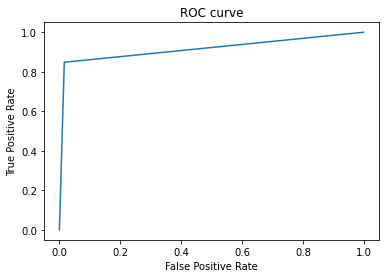


The model running is: RandomForest


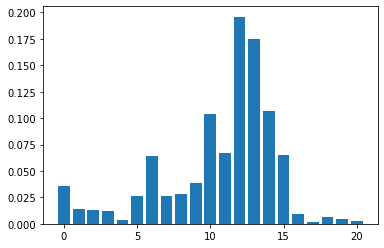

{'Decision Tree Feature': {'Feature 13': 0.29508372878868355}, 'SVM Linear Feature': {'Feature 13': 1.5388422230475953}, 'RandomForest Feature': {'Feature 12': 0.19593287689860056}}
The mean accuracy of  RandomForest  is: 0.960304193630946  and the standard deviation is: 0.0017543861012805858
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      8500
           1       0.94      0.82      0.87      1627

    accuracy                           0.96     10127
   macro avg       0.95      0.90      0.93     10127
weighted avg       0.96      0.96      0.96     10127

                 Predicted Negative  Predicted Positive
Actual Negative                8411                  89
Actual Positive                 294                1333

The FN is  294
The tn is  8411
The tp is  1333
The fp is  89

The precision is:  0.9374120956399438
The recall is:  0.819299323909035
The f1 score is:  0.8743850442768121
Area under the Receiver Operating Chara

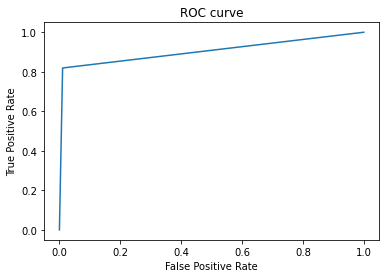


The model running is: Adaboost


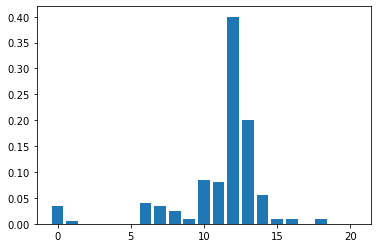

{'Decision Tree Feature': {'Feature 13': 0.29508372878868355}, 'SVM Linear Feature': {'Feature 13': 1.5388422230475953}, 'RandomForest Feature': {'Feature 12': 0.19593287689860056}, 'Adaboost Feature': {'Feature 12': 0.4}}
The mean accuracy of  Adaboost  is: 0.9592186513594871  and the standard deviation is: 0.0038876930902996642
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      8500
           1       0.91      0.84      0.87      1627

    accuracy                           0.96     10127
   macro avg       0.94      0.91      0.92     10127
weighted avg       0.96      0.96      0.96     10127

                 Predicted Negative  Predicted Positive
Actual Negative                8371                 129
Actual Positive                 268                1359

The FN is  268
The tn is  8371
The tp is  1359
The fp is  129

The precision is:  0.9133064516129032
The recall is:  0.835279655808236
The f1 score is:  0.8725521669341895


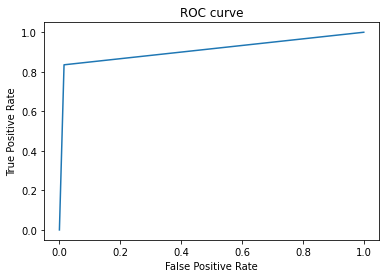

In [43]:
# define the scoring method
scoring = 'accuracy'

# define models to train
names = ['Decision Tree',
         'SVM Linear',
#          'SVM RBF', 
#          'SVM Sigmoid'
        'BaggingClassifier',
        'RandomForest',
        'Adaboost'
        ]

# build classifiers
classifiers = [
    tree.DecisionTreeClassifier(),
    SVC(kernel='linear', C = 2.0, gamma='scale'),
#     SVC(kernel='rbf', C = 2.0, gamma='scale'),
#     SVC(kernel='sigmoid', C = 2.0, gamma='scale'),
    BaggingClassifier(n_estimators=200, oob_score = True),
    RandomForestClassifier(n_estimators=200, max_features = "sqrt", oob_score = True),
    AdaBoostClassifier(n_estimators=200, learning_rate = 0.3)
]

models = zip(names, classifiers)

# evaluate each model in turn
results = []
#results_2 = []
#results_3 = []

for name, model in models:
    # Use stratified k-fold cross validation to deal with imbalanced data
    print("The model running is: " + name)
    kfold = StratifiedKFold(n_splits=5, shuffle=True)
    # Test the stratified k-fold cross-validation:
#     for train_index, test_index in kfold.split(X, y):
#         print("TRAIN:", len(train_index), "TEST:", len(test_index))
    if name != "BaggingClassifier":
        feature_importance(name, model)
    high_low_feature(feature_dict)
    scores = cross_val_score(model, X, y, cv = kfold)
    results.append((scores.mean(), scores.std()))
    print("The mean accuracy of ", name, " is:", scores.mean(), " and the standard deviation is:", scores.std())
    y_pred = cross_val_predict(model, X, y, cv=kfold)
    print(classification_report(y, y_pred))
    
    confusion_mat = confusion_matrix(y, y_pred)
    graph = pd.DataFrame(confusion_mat, 
             columns=['Predicted Negative', 'Predicted Positive'], 
             index=['Actual Negative', 'Actual Positive'])
    
    print(graph)
    print()
    fn = confusion_mat[1][0]
    tn = confusion_mat[0][0]
    tp = confusion_mat[1][1]
    fp = confusion_mat[0][1] 
    
    print("The FN is ", fn)
    print("The tn is ", tn)
    print("The tp is ", tp)
    print("The fp is ", fp)
    
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    f1_score = 2 * (precision * recall / (precision + recall))
    
    print()
    print("The precision is: ", precision)
    print("The recall is: ", recall)
    print("The f1 score is: ", f1_score)

    print('Area under the Receiver Operating Characteristic curve:', str(roc_auc_score(y, y_pred)))
    fpr, tpr, thresholds = roc_curve(y, y_pred)
    plt.plot(fpr, tpr)
    plt.title('ROC curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.show()
    print()